# Exploratory Data Analysis (EDA) on HAM10000 Skin Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plotting style
sns.set(style="whitegrid")


In [2]:
# Load the metadata CSV
csv_path = "HAM10000_metadata.csv"
df = pd.read_csv(csv_path)

# Show the first few rows
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


## Dataset Overview

In [3]:
# Basic info and summary statistics
print("Dataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe(include='all')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB

Summary Statistics:


,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


## Missing Values

In [4]:
# Show missing values
missing = df.isnull().sum()
print("Missing Values Per Column:\n", missing)


Missing Values Per Column:
 lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


## Class Distributions

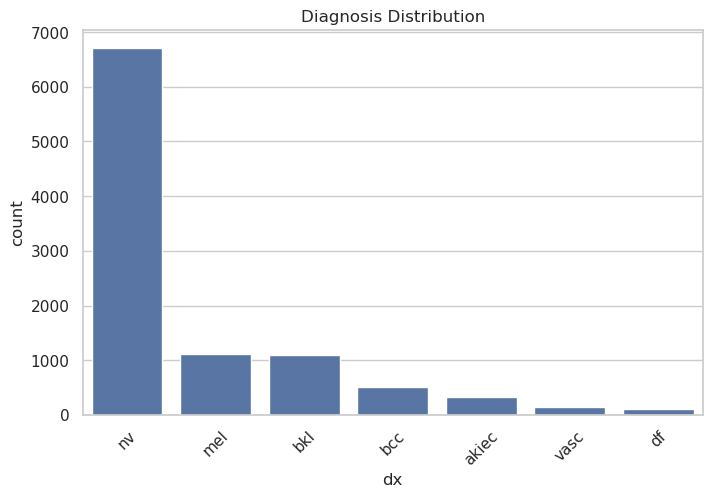

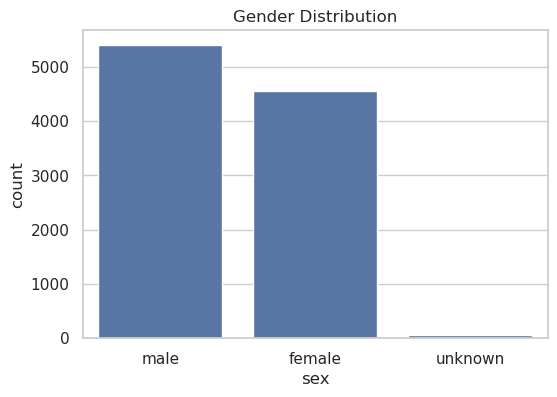

In [5]:
# Diagnosis distribution
plt.figure(figsize=(8,5))
sns.countplot(x='dx', data=df, order=df['dx'].value_counts().index)
plt.title("Diagnosis Distribution")
plt.xticks(rotation=45)
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()


## Age Distribution

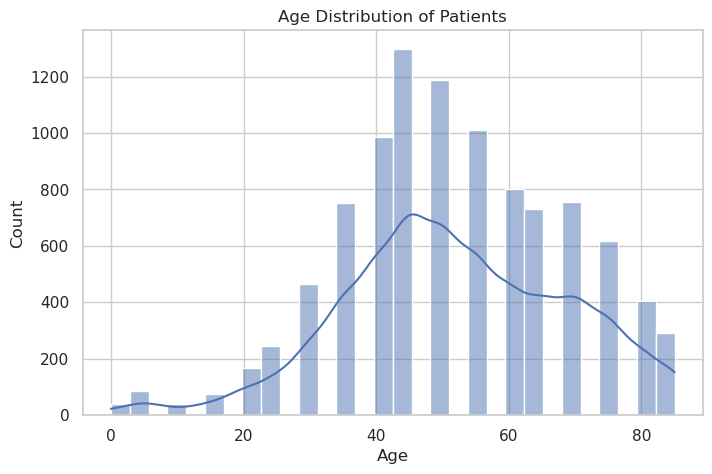

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Correlations

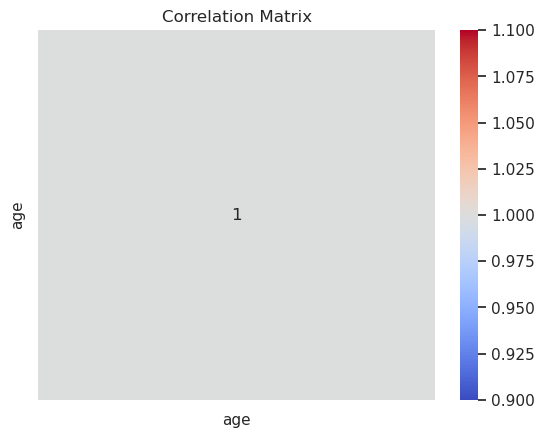

In [7]:
# Correlation matrix for numerical features
corr = df[['age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Possible Biases in Data

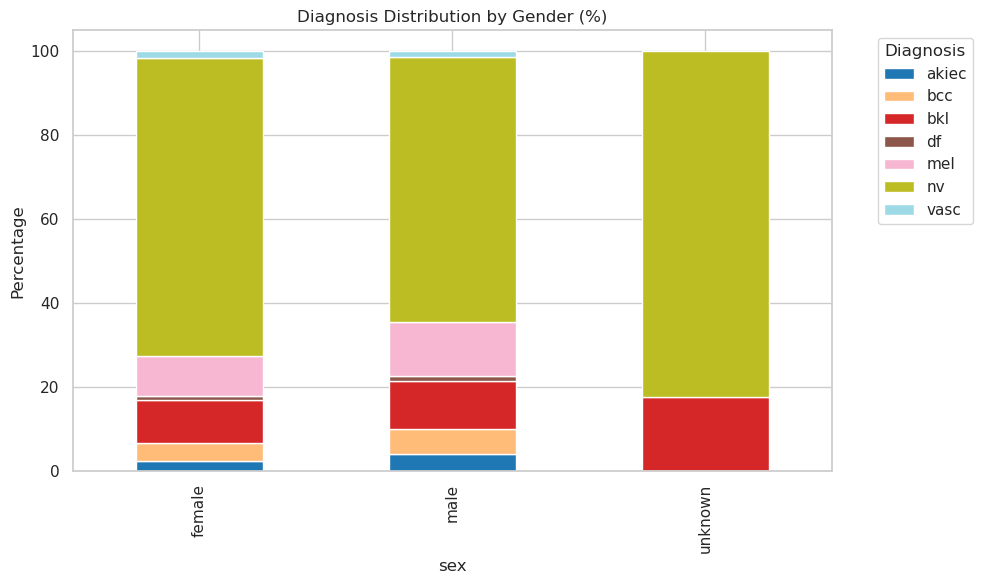

In [8]:
# Cross tab between gender and diagnosis
bias_df = pd.crosstab(df['sex'], df['dx'], normalize='index') * 100
bias_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title("Diagnosis Distribution by Gender (%)")
plt.ylabel("Percentage")
plt.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
